In [1]:
import pandas as pd
import numpy as np

In [2]:
path = "./data.csv"

df = pd.read_csv(path)
df.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


In [3]:
df.describe()

,year,month,value
count,37994.000000,37994.000000,3.751800e+04
mean,2018.545455,6.454545,2.970826e+04
std,2.903442,3.473677,1.504204e+05
min,2014.000000,1.000000,0.000000e+00
25%,2016.000000,3.000000,8.092500e+02
50%,2019.000000,6.000000,4.380000e+03
75%,2021.000000,9.000000,1.616350e+04
max,2024.000000,12.000000,3.391775e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37994 non-null  int64  
 1   month               37994 non-null  int64  
 2   duoarea             37994 non-null  object 
 3   area-name           37994 non-null  object 
 4   product             37994 non-null  object 
 5   product-name        37994 non-null  object 
 6   process             37994 non-null  object 
 7   process-name        37994 non-null  object 
 8   series              37994 non-null  object 
 9   series-description  37994 non-null  object 
 10  value               37518 non-null  float64
 11  units               37994 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB


In [5]:
df.isna().sum()

year                    0
month                   0
duoarea                 0
area-name               0
product                 0
product-name            0
process                 0
process-name            0
series                  0
series-description      0
value                 476
units                   0
dtype: int64

In [6]:
df['value'].value_counts()

value
0.0        1085
1.0         439
8.0         230
2.0         223
6.0         216
           ... 
37604.0       1
94600.0       1
34777.0       1
5506.0        1
20557.0       1
Name: count, Length: 18923, dtype: int64

In [7]:
#Create a date column for time series analysis
df['date'] = pd.to_datetime(df['year'].astype(str) + df['month'].astype(str).str.zfill(2) + '01', format='%Y%m%d')


In [8]:
#checking for patterns in null records
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

print(null_rows)

       year  month duoarea area-name product product-name process  \
18     2014      1     SDC    USA-DC    EPG0  Natural Gas     VEU   
135    2014      1     SHI    USA-HI    EPG0  Natural Gas     VEU   
518    2014      2     SHI    USA-HI    EPG0  Natural Gas     VEU   
597    2014      2     SDC    USA-DC    EPG0  Natural Gas     VEU   
778    2014      3     SHI    USA-HI    EPG0  Natural Gas     VEU   
...     ...    ...     ...       ...     ...          ...     ...   
37945  2024      1     SWV    USA-WV    EPG0  Natural Gas     VRS   
37964  2024      1     SHI    USA-HI    EPG0  Natural Gas     VEU   
37967  2024      1     SNV    USA-NV    EPG0  Natural Gas     VGT   
37982  2024      1     SFL   FLORIDA    EPG0  Natural Gas     VIN   
37986  2024      1     SIL    USA-IL    EPG0  Natural Gas     VRS   

                     process-name    series  \
18     Electric Power Consumption  N3045DC2   
135    Electric Power Consumption  N3045HI2   
518    Electric Power Consumpt

In [9]:
for col in null_rows.columns:
    print(f"Value counts for column '{col}':")
    print(null_rows[col].value_counts())
    print("-" * 20)

#Maximum of the null values come from DC & Hawaii:
# Hawaii Natural Gas Deliveries to Electric Power Consumers (MMcf)                                                121
# District of Columbia Natural Gas Deliveries to Electric Power Consumers (MMcf)                                  109
# the District of Columbia Natural Gas Industrial Consumption (MMcf)                                               72

#Over 150 of the 476 null value records come from year 2023


Value counts for column 'year':
year
2023    157
2022     48
2019     39
2021     39
2018     37
2017     36
2020     36
2014     24
2015     24
2024     22
2016     14
Name: count, dtype: int64
--------------------
Value counts for column 'month':
month
1     55
10    42
3     41
4     40
12    40
5     39
9     39
2     38
6     38
11    38
7     35
8     31
Name: count, dtype: int64
--------------------
Value counts for column 'duoarea':
duoarea
SDC    181
SHI    121
SNH     22
SVT     22
STN     22
SME     14
SNV     12
SNJ     12
SWY     11
SNE      9
SWV      8
SNM      8
SWA      6
SVA      4
SSD      3
SAZ      2
SFL      2
SAK      2
SIL      2
SPA      2
SIN      2
SMN      2
SKS      2
SMT      2
SCA      2
SND      1
Name: count, dtype: int64
--------------------
Value counts for column 'area-name':
area-name
USA-DC        181
USA-HI        121
USA-NH         22
USA-VT         22
USA-TN         22
USA-ME         14
USA-NV         12
USA-NJ         12
USA-WY         11
USA-N

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37518 entries, 0 to 37993
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   year                37518 non-null  int64         
 1   month               37518 non-null  int64         
 2   duoarea             37518 non-null  object        
 3   area-name           37518 non-null  object        
 4   product             37518 non-null  object        
 5   product-name        37518 non-null  object        
 6   process             37518 non-null  object        
 7   process-name        37518 non-null  object        
 8   series              37518 non-null  object        
 9   series-description  37518 non-null  object        
 10  value               37518 non-null  float64       
 11  units               37518 non-null  object        
 12  date                37518 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(

In [12]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_count}")

Number of duplicate entries: 0


In [13]:
df['state'] = df['area-name'].str.replace('USA-', '')
df['year_quarter'] = df['date'].dt.to_period('Q')

In [14]:
df.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,date,state,year_quarter
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF,2014-01-01,FLORIDA,2014Q1
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF,2014-01-01,NH,2014Q1
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF,2014-01-01,OR,2014Q1
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF,2014-01-01,DE,2014Q1
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF,2014-01-01,AZ,2014Q1


In [15]:
df['state'].value_counts()

state
U.S.             968
ID               726
AL               726
RI               726
MD               726
MO               726
LA               726
KY               726
UT               726
MASSACHUSETTS    726
CT               726
OHIO             726
SC               726
TEXAS            726
IA               726
GA               726
NEW YORK         726
WI               726
COLORADO         726
OK               726
AR               726
OR               726
DE               726
MS               726
MI               726
NC               726
ND               725
PA               724
KS               724
CALIFORNIA       724
AZ               724
AK               724
MT               724
IN               724
MINNESOTA        724
IL               724
FLORIDA          724
SD               723
VA               722
WASHINGTON       720
NM               718
WV               718
NE               717
WY               715
NV               714
NJ               714
ME               712
TN     

In [16]:
distinct_states = df['state'].nunique()
print(f"Distinct values in col1: {distinct_states}")
#50 states +us +dc

Distinct values in col1: 52


In [17]:
us = df[df['state'] == 'U.S.'].copy()
us['series-description'].value_counts()

series-description
U.S. Natural Gas Pipeline & Distribution Use (MMcf)                                                        121
Natural Gas Delivered to Consumers in the U.S. (MMcf)                                                      121
U.S. Natural Gas Industrial Consumption (MMcf)                                                             121
U.S. Natural Gas Deliveries to Electric Power Consumers (MMcf)                                             121
U.S. Natural Gas Residential Consumption (MMcf)                                                            121
Natural Gas Deliveries to Commercial Consumers (Including Vehicle Fuel through 1996) in the U.S. (MMcf)    121
U.S. Natural Gas Vehicle Fuel Consumption (MMcf)                                                           121
U.S. Natural Gas Lease and Plant Fuel Consumption (MMcf)                                                   121
Name: count, dtype: int64

In [18]:
df.sort_values(by='value', ascending=False).head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,date,state,year_quarter
37815,2024,1,NUS,U.S.,EPG0,Natural Gas,VGT,Delivered to Consumers,N3060US2,Natural Gas Delivered to Consumers in the U.S....,3391775.0,MMCF,2024-01-01,U.S.,2024Q1
30309,2022,1,NUS,U.S.,EPG0,Natural Gas,VGT,Delivered to Consumers,N3060US2,Natural Gas Delivered to Consumers in the U.S....,3301692.0,MMCF,2022-01-01,U.S.,2022Q1
18943,2019,1,NUS,U.S.,EPG0,Natural Gas,VGT,Delivered to Consumers,N3060US2,Natural Gas Delivered to Consumers in the U.S....,3161732.0,MMCF,2019-01-01,U.S.,2019Q1
15291,2018,1,NUS,U.S.,EPG0,Natural Gas,VGT,Delivered to Consumers,N3060US2,Natural Gas Delivered to Consumers in the U.S....,3107734.0,MMCF,2018-01-01,U.S.,2018Q1
33894,2022,12,NUS,U.S.,EPG0,Natural Gas,VGT,Delivered to Consumers,N3060US2,Natural Gas Delivered to Consumers in the U.S....,3086737.0,MMCF,2022-12-01,U.S.,2022Q4


In [19]:
states = df[df['state'] != 'U.S.'].copy()


In [20]:
states.groupby('state')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AK,724.0,2251.102210,2621.134725,0.0,483.50,1707.5,2709.00,16656.0
AL,726.0,18679.712121,20860.521684,6.0,1088.00,12270.0,32527.50,72452.0
AR,726.0,9024.628099,9442.764388,2.0,1413.25,6638.0,11959.00,40254.0
AZ,724.0,11068.294199,14277.900333,120.0,1432.75,2375.5,21601.00,52334.0
CALIFORNIA,724.0,57927.973757,57384.055264,1176.0,17727.25,45555.0,66364.25,233993.0
COLORADO,726.0,10960.909091,12069.595570,25.0,2835.00,7604.0,12691.75,62948.0
CT,726.0,7411.398072,8084.501686,1.0,1598.25,3726.5,11299.75,34318.0
DC,545.0,1061.302752,1219.545298,0.0,37.00,745.0,1626.00,6278.0
DE,726.0,2562.807163,2706.271529,0.0,410.00,1871.0,3214.50,11006.0


In [21]:
state_mapping = {
    "CALIFORNIA": "CA",
    "COLORADO": "CO",
    "FLORIDA": "FL",
    "MASSACHUSETTS": "MA",
    "MINNESOTA": "MN",
    "NEW YORK": "NY",
    "OHIO": "OH",
    "TEXAS": "TX",
    "WASHINGTON": "WA"
}

def normalize_state(state_value):
    if not isinstance(state_value, str):
        return state_value  
    state_value = state_value.strip().upper()
    return state_mapping.get(state_value, state_value)

states['state'] = states['state'].apply(normalize_state)
states.groupby('state')['value'].describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
AK,724.0,2251.102210,2621.134725,0.0,483.50,1707.5,2709.00,16656.0
AL,726.0,18679.712121,20860.521684,6.0,1088.00,12270.0,32527.50,72452.0
AR,726.0,9024.628099,9442.764388,2.0,1413.25,6638.0,11959.00,40254.0
AZ,724.0,11068.294199,14277.900333,120.0,1432.75,2375.5,21601.00,52334.0
CA,724.0,57927.973757,57384.055264,1176.0,17727.25,45555.0,66364.25,233993.0
CO,726.0,10960.909091,12069.595570,25.0,2835.00,7604.0,12691.75,62948.0
CT,726.0,7411.398072,8084.501686,1.0,1598.25,3726.5,11299.75,34318.0
DC,545.0,1061.302752,1219.545298,0.0,37.00,745.0,1626.00,6278.0
DE,726.0,2562.807163,2706.271529,0.0,410.00,1871.0,3214.50,11006.0


In [22]:
monthly_consumption = states.groupby(['year', 'month', 'state'])['value'].sum().reset_index()

In [23]:
states['month_name'] = states['date'].dt.month_name()
seasonal_patterns = states.groupby(['state', 'month_name'])['value'].mean().reset_index()


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

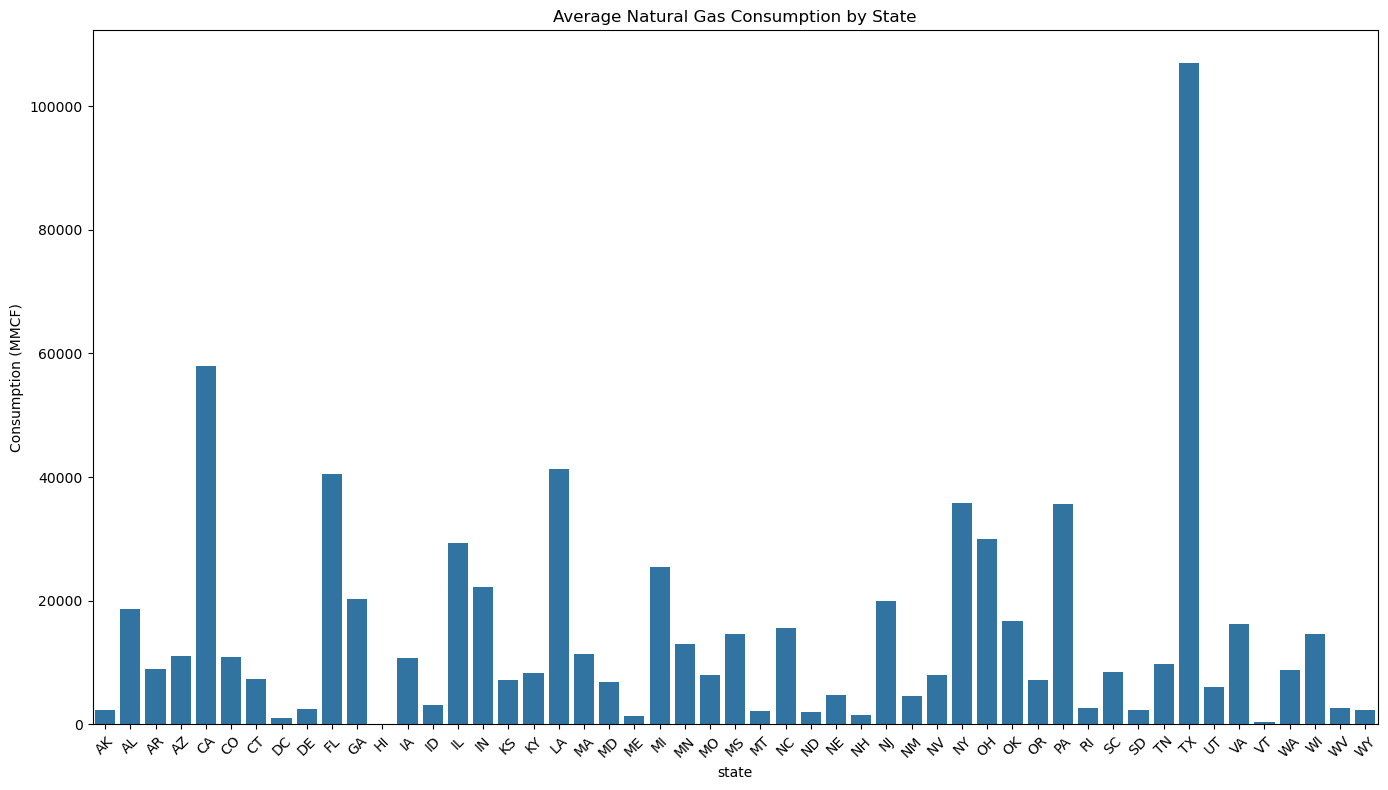

In [25]:
#avg consumption State comparison
plt.figure(figsize=(14, 8))
sns.barplot(x='state', y='value', data=states.groupby('state')['value'].mean().reset_index())
plt.title('Average Natural Gas Consumption by State')
plt.xticks(rotation=45)
plt.ylabel('Consumption (MMCF)')
plt.tight_layout()
plt.savefig('state_comparison.png')

In [26]:
yearly_data = states.groupby(['year', 'state'])['value'].sum().reset_index()
yearly_data_pivot = yearly_data.pivot(index='year', columns='state', values='value')
yearly_growth = yearly_data_pivot.pct_change() * 100

In [27]:
yearly_growth
#growth spike in 2018

state,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
year,,,,,,,,,,,,,,,,,,,,,
2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,-0.456816,6.973955,10.482647,14.598936,-1.435971,-4.974381,7.698647,-3.443295,1.223869,9.739108,...,-2.926568,2.361291,5.445582,-4.889863,19.599367,11.950341,-0.652759,-1.116675,-0.357408,-0.044238
2016,-8.155060,2.320746,7.476966,3.225336,-5.800178,1.975212,-2.144718,-10.933770,5.954778,2.625783,...,2.308399,4.792789,-2.599939,7.037175,8.971187,1.240159,-2.117569,5.341273,2.110553,8.635024
2017,3.985206,-4.777380,1.476479,-10.974010,-2.529236,0.166650,-3.783336,1.236355,-8.842757,0.489514,...,0.314521,-1.112076,-4.184039,-6.150801,4.378032,-0.359547,7.986057,1.154345,5.892502,3.244144
2018,-6.539159,13.637210,16.398243,20.600389,1.121223,12.756133,16.099128,6.499832,-3.382349,6.554645,...,11.590683,21.377810,16.140153,11.670121,12.066210,15.235178,-5.745264,11.349547,6.223792,15.450599
2019,-2.371836,-2.790456,1.104233,21.726090,0.264061,7.225243,2.168729,-5.090644,-5.886822,4.497397,...,0.482349,2.430827,2.268941,9.988472,7.440186,1.110545,13.867708,4.711645,1.058576,-3.144981
2020,7.052113,-5.076816,-9.460600,6.564716,-2.671114,-2.236602,1.414350,-7.362852,-4.299327,2.373022,...,-4.697129,-6.014144,-0.787297,-2.713417,5.017376,-6.053513,-5.931555,-3.627894,0.101514,-0.818155
2021,26.031418,3.789189,7.848262,-6.254703,0.716314,-4.749221,2.721158,0.098008,-7.466760,-1.628721,...,5.549434,3.631833,-0.166545,2.464572,-7.135697,1.744097,7.781475,-1.979885,3.463892,-10.476879
2022,42.130741,6.630947,9.866969,-3.162173,-1.990132,6.054128,0.585019,4.185731,7.529972,4.475922,...,3.336893,6.926819,5.405528,5.600330,-3.079424,1.571036,-0.721203,7.949922,-0.455006,15.590530


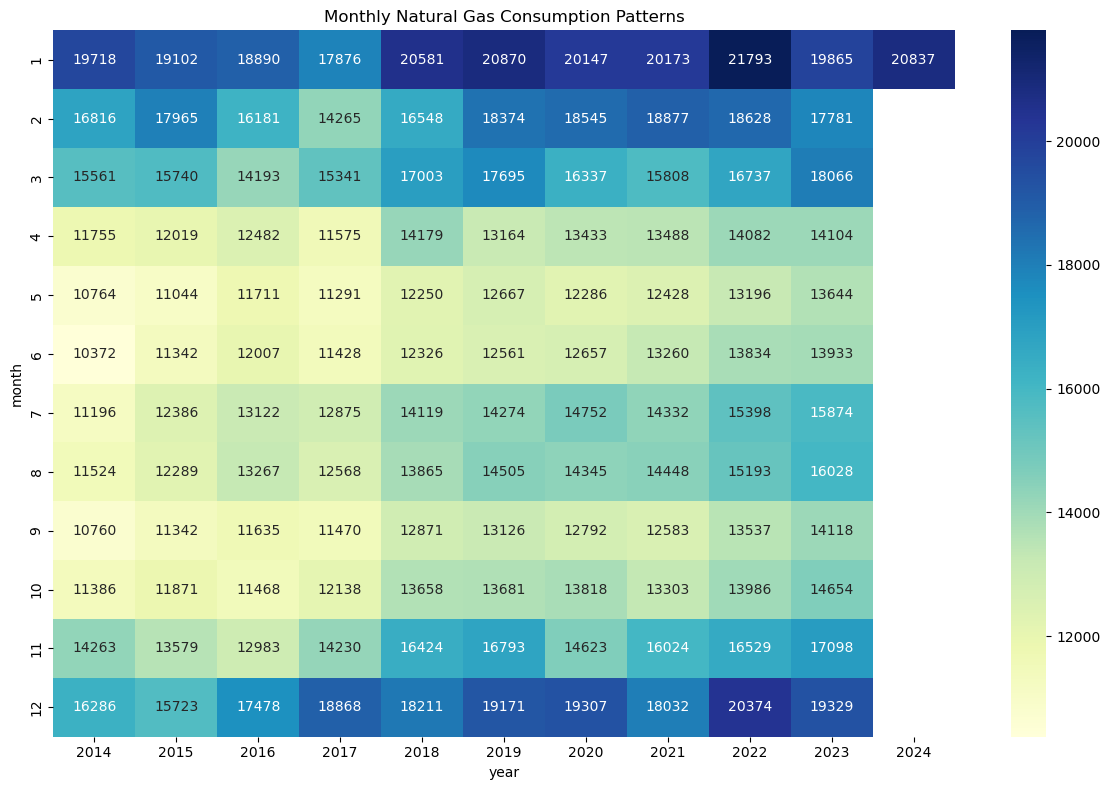

In [28]:
#Heatmap of consumption patterns
pivot_data = states.pivot_table(index='month', columns='year', values='value', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Monthly Natural Gas Consumption Patterns')
plt.tight_layout()
plt.savefig('consumption_heatmap.png')

In [29]:
#Forecasting future consumption
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

In [30]:
texas_data = states[states['state'] == 'TX'].copy()
texas_ts = texas_data.set_index('date')['value']

In [31]:
texas_data.value_counts('process-name')

process-name
Commercial Consumption        121
Delivered to Consumers        121
Electric Power Consumption    121
Industrial Consumption        121
Residential Consumption       121
Vehicle Fuel Consumption      121
Name: count, dtype: int64

In [32]:
texas_ts

date
2014-01-01    332920.0
2014-01-01       353.0
2014-01-01    107671.0
2014-01-01    140888.0
2014-01-01     27526.0
                ...   
2024-01-01    430450.0
2024-01-01    169590.0
2024-01-01     28169.0
2024-01-01     52904.0
2024-01-01    179698.0
Name: value, Length: 726, dtype: float64

In [33]:
consumption_types = texas_data['process-name'].unique()
print(f"Different consumption types: {consumption_types}")


Different consumption types: ['Delivered to Consumers' 'Vehicle Fuel Consumption'
 'Electric Power Consumption' 'Industrial Consumption'
 'Commercial Consumption' 'Residential Consumption']


In [34]:
# Create a pivot table with dates as index and consumption types as columns
pivot_df = texas_data.pivot_table(
    index='date', 
    columns='process-name',
    values='value',
    aggfunc='sum'
)

# Ensure the time series is continuous and ordered
pivot_df = pivot_df.sort_index()

In [35]:
pivot_df

process-name,Commercial Consumption,Delivered to Consumers,Electric Power Consumption,Industrial Consumption,Residential Consumption,Vehicle Fuel Consumption
date,,,,,,
2014-01-01,27526.0,332920.0,107671.0,140888.0,56481.0,353.0
2014-02-01,24160.0,291978.0,94715.0,127448.0,45335.0,319.0
2014-03-01,19205.0,280010.0,94692.0,135561.0,30199.0,353.0
2014-04-01,14780.0,260005.0,99834.0,129422.0,15627.0,342.0
2014-05-01,11280.0,266265.0,111872.0,133904.0,8855.0,353.0
...,...,...,...,...,...,...
2023-09-01,11160.0,379292.0,201044.0,161759.0,5244.0,86.0
2023-10-01,14199.0,338156.0,147443.0,166680.0,9745.0,88.0
2023-11-01,18115.0,346283.0,136570.0,170734.0,20777.0,86.0


In [48]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


In [49]:
# Example for one consumption type (e.g., Residential Consumption)
residential_data = texas_data[texas_data['process-name'] == 'Residential Consumption']['value']
residential_ts = pd.Series(
    residential_data.values,
    index=pd.DatetimeIndex(texas_data[texas_data['process-name'] == 'Residential Consumption']['date'])
)

# Use auto_arima to find optimal parameters
auto_model = auto_arima(
    residential_ts,
    seasonal=True,
    m=12,  # Monthly seasonality
    d=1,   # Differencing
    D=1,   # Seasonal differencing
    start_p=0, start_q=0,
    max_p=3, max_q=3,
    start_P=0, start_Q=0,
    max_P=2, max_Q=2,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(f"Best SARIMA parameters: {auto_model.order}, {auto_model.seasonal_order}")

# Implement SARIMA with the best parameters
model = SARIMAX(
    residential_ts,
    order=auto_model.order,
    seasonal_order=auto_model.seasonal_order
)
results = model.fit()

# Forecast next 12 months
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(
    start=residential_ts.index[-1] + pd.DateOffset(months=1),
    periods=forecast_steps,
    freq='MS'
)

# Get confidence intervals
forecast_ci = forecast.conf_int()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2225.339, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=2203.865, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=2180.640, Time=0.07 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=2207.856, Time=0.02 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=2181.810, Time=0.15 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=2173.818, Time=0.39 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.75 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=2202.570, Time=0.10 sec
 ARIMA(1,1,1)(0,1,2)[12]             : AIC=2171.140, Time=0.49 sec
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=2171.746, Time=0.26 sec
 ARIMA(1,1,1)(1,1,2)[12]             : AIC=inf, Time=0.91 sec
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=2179.986, Time=0.17 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=2188.400, Time=0.14 sec
 ARIMA(2,1,1)(0,1,2)[12]             : AIC=2181.078, Time=0.31 sec
 ARIMA(1,1,2)(0,1,2)[12]     

C:\Users\risha\anaconda3\envs\analysis_arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\risha\anaconda3\envs\analysis_arima\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [50]:
def forecast_consumption_type(texas_data, process_type, forecast_periods=12):
    """Forecast a specific consumption type."""
    # Filter data for the specific process type
    type_data = texas_data[texas_data['process-name'] == process_type]
    
    # Create time series
    ts_data = type_data.set_index('date')['value']
    
    # Check if we have enough data
    if len(ts_data) < 24:  # Need at least 2 years of data
        print(f"Insufficient data for {process_type}")
        return None, None, None
    
    # Find best model with auto_arima
    model = auto_arima(
        ts_data,
        seasonal=True,
        m=12,
        start_p=0, start_q=0,
        max_p=2, max_q=2,
        start_P=0, start_Q=0,
        max_P=1, max_Q=1,
        d=1, D=1,
        trace=False,
        error_action='ignore',
        suppress_warnings=True
    )
    
    # Fit model
    results = model.fit(ts_data)
    
    # Forecast
    forecast = results.predict(n_periods=forecast_periods)
    
    # Create forecast index
    last_date = ts_data.index[-1]
    forecast_index = pd.date_range(
        start=last_date + pd.DateOffset(months=1),
        periods=forecast_periods,
        freq='MS'
    )
    
    forecast_series = pd.Series(forecast, index=forecast_index)
    
    return ts_data, forecast_series, model

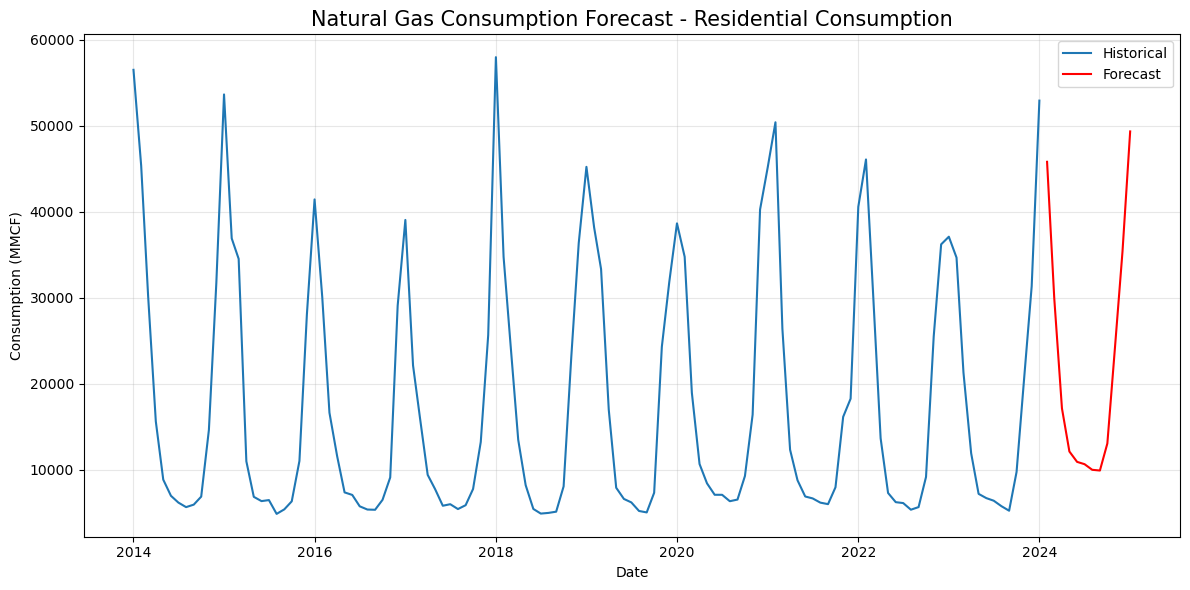

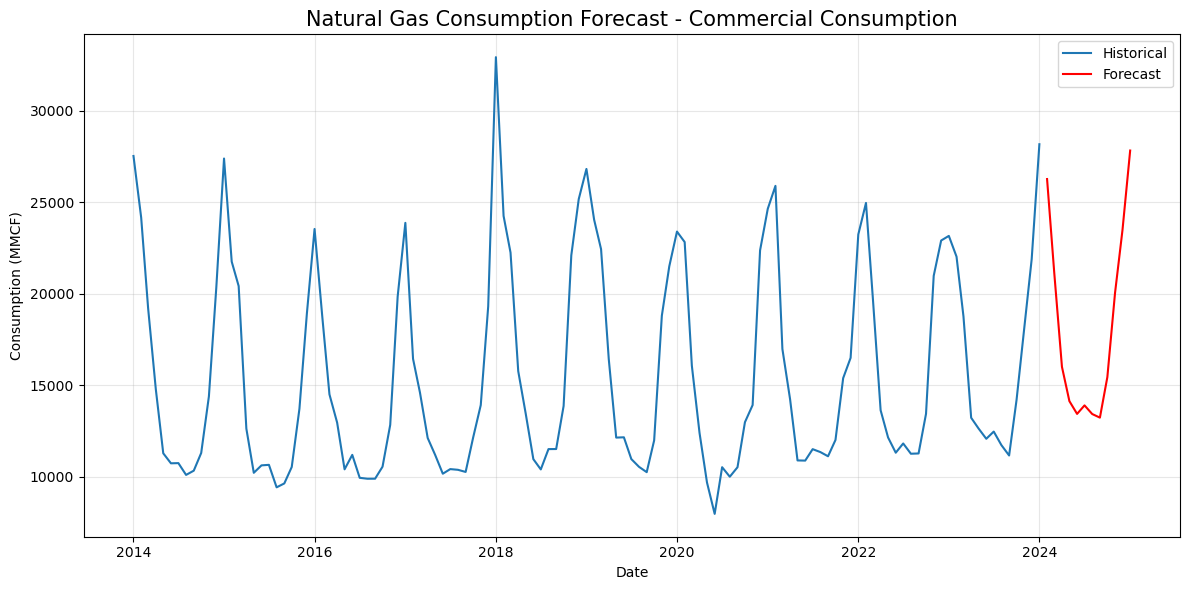

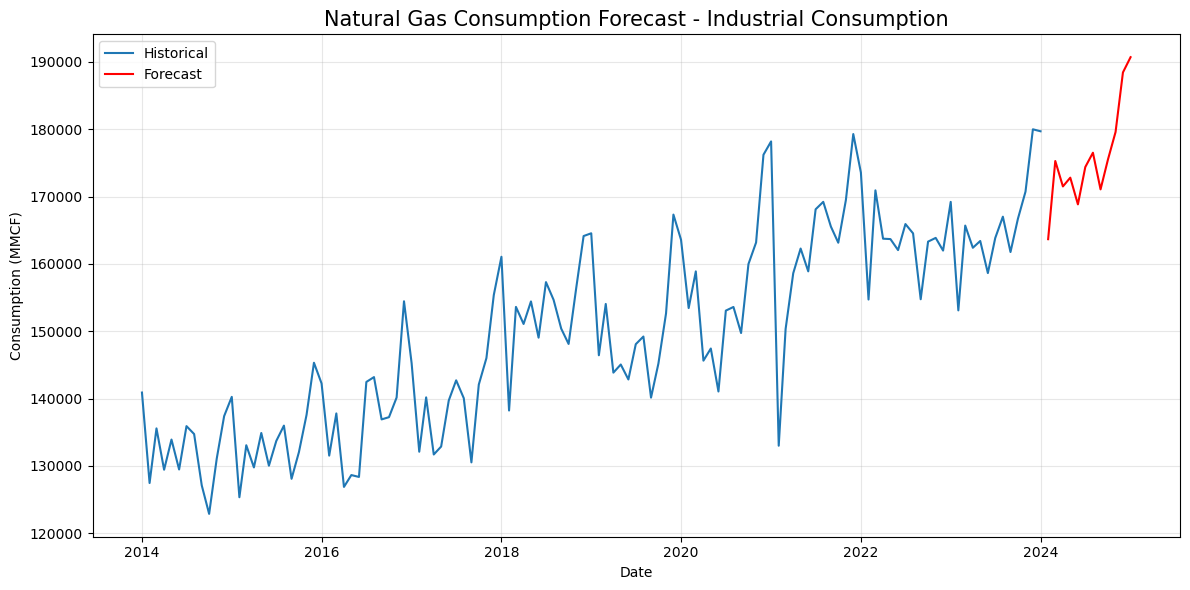

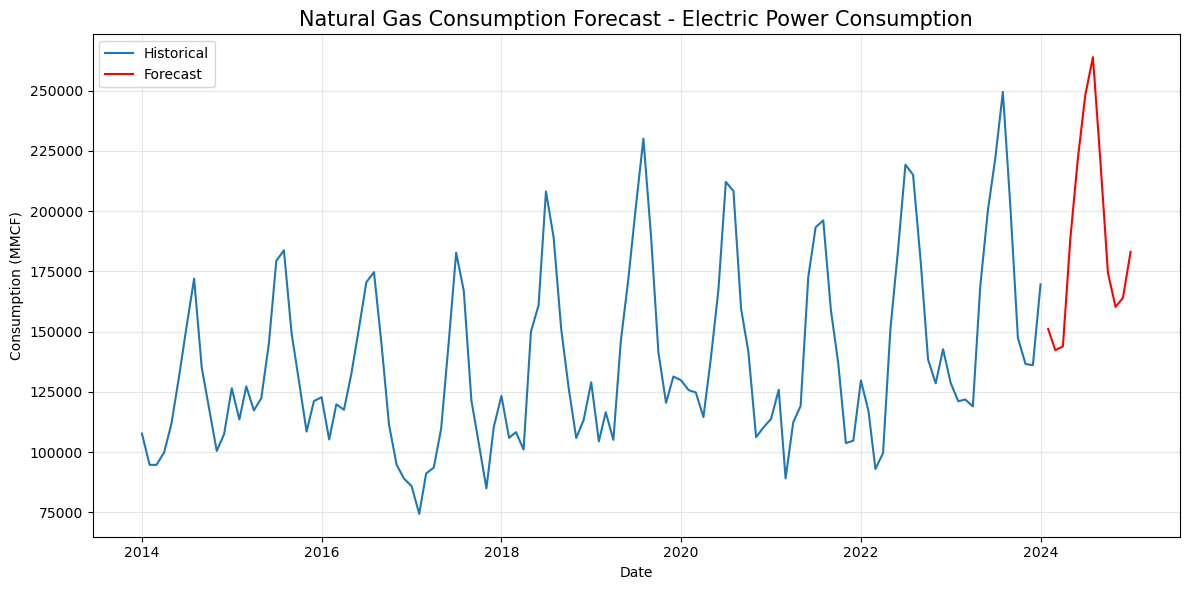

In [51]:
# Create a function to plot forecasts
def plot_forecast(historical, forecast, title, process_type):
    plt.figure(figsize=(12, 6))
    
    # Plot historical data
    plt.plot(historical.index, historical, label='Historical')
    
    # Plot forecast
    plt.plot(forecast.index, forecast, label='Forecast', color='red')
    
    # Add confidence intervals (if available)
    # plt.fill_between(forecast.index, lower_ci, upper_ci, color='pink', alpha=0.3)
    
    plt.title(f'{title} - {process_type}', fontsize=15)
    plt.xlabel('Date')
    plt.ylabel('Consumption (MMCF)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    return plt.gcf()

# Create forecasts for each consumption type
consumption_types = [
    'Residential Consumption',
    'Commercial Consumption',
    'Industrial Consumption',
    'Electric Power Consumption'
]

# Dictionary to store all forecasts
forecasts = {}

for c_type in consumption_types:
    hist, fore, model = forecast_consumption_type(texas_data, c_type)
    if hist is not None:
        forecasts[c_type] = (hist, fore, model)
        fig = plot_forecast(hist, fore, 'Natural Gas Consumption Forecast', c_type)
        fig.savefig(f'{c_type.lower().replace(" ", "_")}_forecast.png')

In [52]:
# Function to evaluate model performance with cross-validation
def evaluate_model(texas_data, process_type, test_size=12):
    """Evaluate model performance using the last n months as a test set."""
    type_data = texas_data[texas_data['process-name'] == process_type]
    ts_data = type_data.set_index('date')['value']
    
    # Split into train and test
    train = ts_data[:-test_size]
    test = ts_data[-test_size:]
    
    # Find best model
    model = auto_arima(
        train,
        seasonal=True,
        m=12,
        start_p=0, max_p=2,
        start_q=0, max_q=2,
        start_P=0, max_P=1,
        start_Q=0, max_Q=1,
        d=1, D=1,
        trace=False,
        error_action='ignore',
        suppress_warnings=True
    )
    
    # Fit and forecast
    model_fit = model.fit(train)
    forecast = model_fit.predict(n_periods=len(test))
    
    # Calculate error metrics
    mape = np.mean(np.abs((test.values - forecast) / test.values)) * 100
    rmse = np.sqrt(np.mean((test.values - forecast)**2))
    
    return {
        'MAPE': mape,
        'RMSE': rmse,
        'Model': model,
        'Actual': test,
        'Forecast': pd.Series(forecast, index=test.index)
    }

# Evaluate all models
evaluation_results = {}
for c_type in consumption_types:
    try:
        eval_result = evaluate_model(texas_data, c_type)
        evaluation_results[c_type] = eval_result
        print(f"{c_type} - MAPE: {eval_result['MAPE']:.2f}%, RMSE: {eval_result['RMSE']:.2f}")
    except Exception as e:
        print(f"Error evaluating {c_type}: {str(e)}")

Residential Consumption - MAPE: 12.09%, RMSE: 4442.99
Commercial Consumption - MAPE: 5.94%, RMSE: 1277.65
Industrial Consumption - MAPE: 4.60%, RMSE: 9414.43
Electric Power Consumption - MAPE: 6.96%, RMSE: 14961.86


In [53]:
# Calculate year-over-year growth rates for each consumption type
def calculate_growth(forecasts, consumption_types):
    """Calculate projected growth rates from forecasts."""
    growth_rates = {}
    
    for c_type in consumption_types:
        if c_type in forecasts:
            hist, fore, _ = forecasts[c_type]
            
            # Get the last 12 months of historical data
            last_year = hist[-12:].sum()
            
            # Get the forecast for next 12 months
            next_year = fore.sum()
            
            # Calculate growth rate
            growth_rate = ((next_year - last_year) / last_year) * 100
            growth_rates[c_type] = growth_rate
    
    return growth_rates

# Calculate seasonal patterns for capacity planning
def calculate_seasonal_patterns(forecasts, consumption_types):
    """Extract seasonal patterns from forecasts."""
    seasonal_patterns = {}
    
    for c_type in consumption_types:
        if c_type in forecasts:
            hist, _, _ = forecasts[c_type]
            
            # Group by month
            monthly_avg = hist.groupby(hist.index.month).mean()
            monthly_max = hist.groupby(hist.index.month).max()
            
            seasonal_patterns[c_type] = {
                'average': monthly_avg,
                'peak': monthly_max
            }
    
    return seasonal_patterns

In [54]:
texas_data.to_csv('texas_data.csv', index=False)

In [55]:
states.to_csv('states.csv', index=False)

In [56]:
us.to_csv('national.csv', index=False)

In [60]:
states.value_counts('process-name')

process-name
Vehicle Fuel Consumption      6171
Commercial Consumption        6162
Residential Consumption       6154
Delivered to Consumers        6107
Industrial Consumption        6047
Electric Power Consumption    5909
Name: count, dtype: int64

In [66]:
zeros = states[states['value'] == 0.0].copy()
zeros.value_counts('process-name')

process-name
Vehicle Fuel Consumption      1009
Industrial Consumption          49
Electric Power Consumption      27
Name: count, dtype: int64

In [67]:
zeros[zeros['process-name'] != 'Vehicle Fuel Consumption']

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units,date,state,year_quarter,month_name
186,2014,1,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2014-01-01,DC,2014Q1,January
616,2014,2,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2014-02-01,DC,2014Q1,February
665,2014,3,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2014-03-01,DC,2014Q1,March
1039,2014,4,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2014-04-01,DC,2014Q2,April
1402,2014,5,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2014-05-01,DC,2014Q2,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36480,2023,9,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2023-09-01,DC,2023Q3,September
37004,2023,10,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2023-10-01,DC,2023Q4,October
37238,2023,11,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2023-11-01,DC,2023Q4,November
37431,2023,12,SDC,USA-DC,EPG0,Natural Gas,VIN,Industrial Consumption,N3035DC2,the District of Columbia Natural Gas Industria...,0.0,MMCF,2023-12-01,DC,2023Q4,December


Residential Consumption: Projected YoY growth: 25.48%
Commercial Consumption: Projected YoY growth: 11.13%
Industrial Consumption: Projected YoY growth: 5.79%
Electric Power Consumption: Projected YoY growth: 13.48%


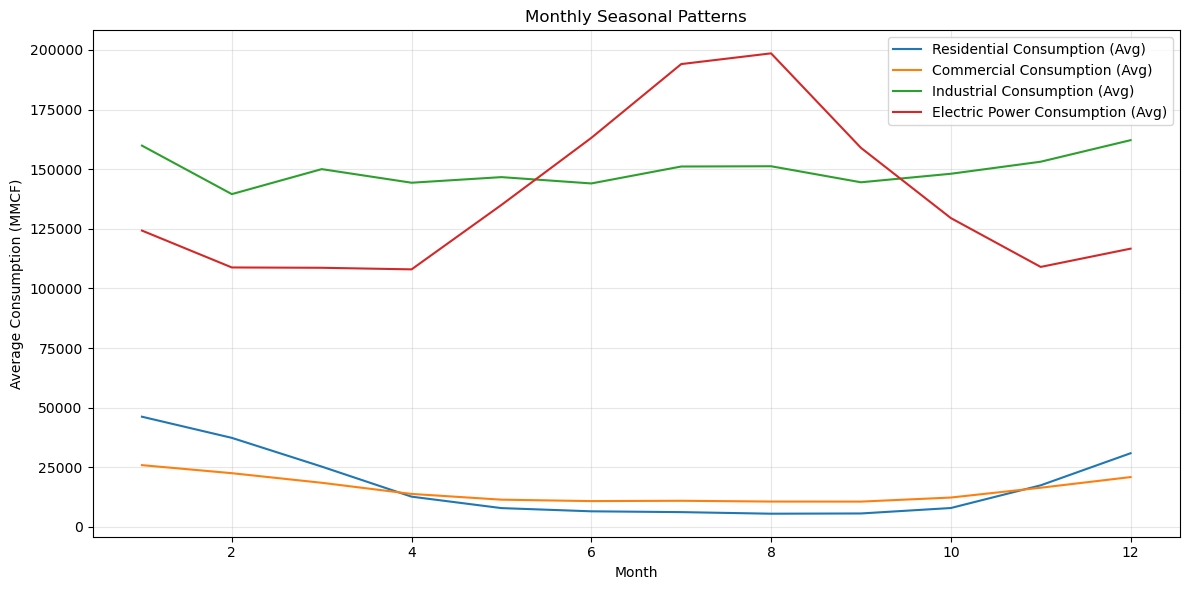

In [69]:
growth_rates = calculate_growth(forecasts, consumption_types)
seasonal_data = calculate_seasonal_patterns(forecasts, consumption_types)

# Print the growth rates
for c_type, growth in growth_rates.items():
    print(f"{c_type}: Projected YoY growth: {growth:.2f}%")

# Visualize seasonal patterns
plt.figure(figsize=(12, 6))
for c_type, patterns in seasonal_data.items():
    plt.plot(patterns['average'].index, patterns['average'], label=f"{c_type} (Avg)")
plt.title("Monthly Seasonal Patterns")
plt.xlabel("Month")
plt.ylabel("Average Consumption (MMCF)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig("seasonal_patterns.png")